<a href="https://colab.research.google.com/github/ArcticFoox/problem_solving_programming/blob/main/problem_solving_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from datetime import datetime

In [ ]:
from google.colab import files
file1 = files.upload()
file2 = files.upload()
file3 = files.upload()
file4 = files.upload()

Saving X_train.xlsx to X_train.xlsx


Saving y_train.xlsx to y_train.xlsx


Saving X_test.xlsx to X_test.xlsx


Saving y_test.xlsx to y_test.xlsx


In [ ]:
import io
X_train = pd.read_excel('X_train.xlsx')
y_train = pd.read_excel('y_train.xlsx')
X_test = pd.read_excel('X_test.xlsx')
y_test = pd.read_excel('y_test.xlsx')

In [ ]:
log_y_train = np.log(y_train) #로그 변환
log_y_test = np.log(y_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

DT_model = DecisionTreeRegressor(max_depth=4)
DT_model.fit(X_train, log_y_train) # X_train = 학습시키는 특성

DT_pred_train = DT_model.predict(X_train)
DT_pred_test = DT_model.predict(X_test)

In [ ]:
def RMSLE(y_true, y_pred):
  y_pred=y_pred.reshape(len(y_pred),1) #모양을 다시 잡아줌으로써 에러 발생을 막음

  y_true = np.exp(y_true)
  y_pred = np.exp(y_pred)

  log_true = np.log(y_true+1)
  log_pred = np.log(y_pred+1)

  output = np.sqrt(np.mean((log_true-log_pred)**2))
  return output

In [ ]:
RMSLE(log_y_train, DT_pred_train)

count    0.676239
dtype: float64

In [ ]:
RMSLE(log_y_test, DT_pred_test)

count    0.687393
dtype: float64

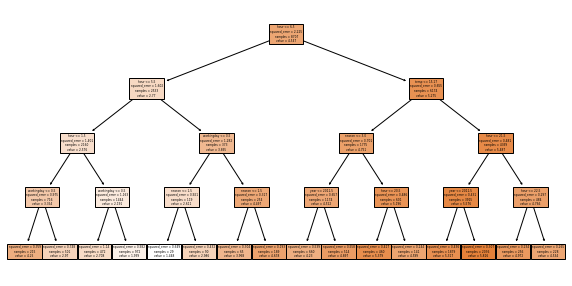

In [ ]:
plt.figure(figsize = (10,5))
#     학습 결정트리 모델         특성값               #값 결정에 따른 색 칠하기
plot_tree(DT_model, feature_names= X_train.columns, filled = True); # Text 출력값 생략

In [ ]:
print("특성 중요도:", DT_model.feature_importances_)

특성 중요도: [0.01725928 0.         0.04854361 0.         0.04611582 0.
 0.         0.02498759 0.8630937  0.        ]


In [ ]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'year', 'hour', 'weekday'],
      dtype='object')

Text(0.5, 1.0, 'Feature Importance')

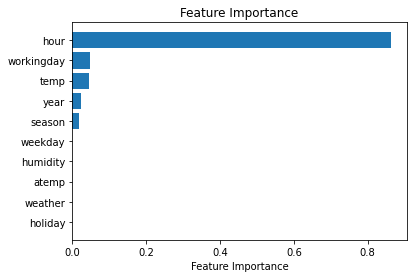

In [ ]:
feature_importance=DT_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(X_train, log_y_train) # X_train = 학습시키는 특성

RF_pred_train = RF_model.predict(X_train)
RF_pred_test = RF_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
RMSLE(log_y_train, RF_pred_train)

count    0.140295
dtype: float64

In [ ]:
RMSLE(log_y_test, RF_pred_test)

count    0.326886
dtype: float64

In [ ]:
print("특성 중요도:", RF_model.feature_importances_)

특성 중요도: [0.03726842 0.00116173 0.03470697 0.01296538 0.04921231 0.02028451
 0.02456736 0.02965295 0.75792767 0.03225271]


Text(0.5, 1.0, 'Feature Importance')

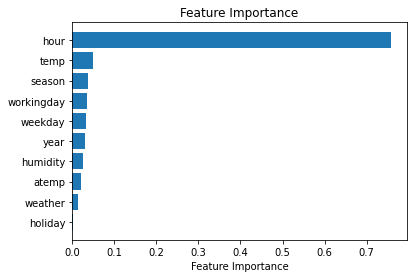

In [ ]:
feature_importance=RF_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')

In [ ]:
from sklearn.linear_model import LinearRegression
Lin_model=LinearRegression()
Lin_model.fit(X_train, log_y_train)

LinearRegression()

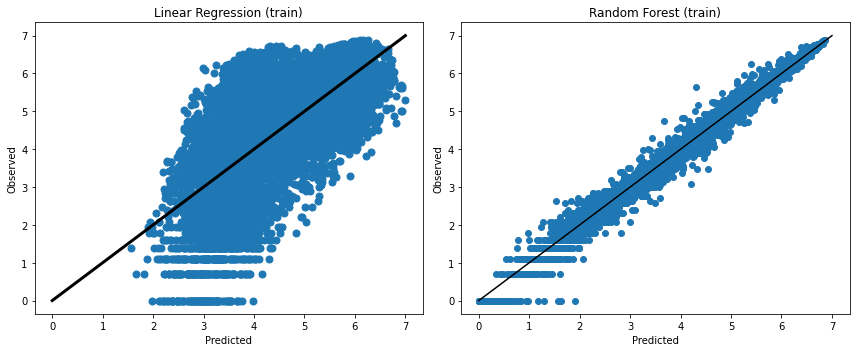

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
x=np.linspace(0,7)
y=x
lines=plt.plot(Lin_model.predict(X_train),log_y_train,'o',x,y,'k')
plt.setp(lines[0], markersize=7)
plt.setp(lines[1], linewidth=3)
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Linear Regression (train)')
plt.tight_layout()

plt.subplot(1,2,2)
lines2=plt.plot(RF_model.predict(X_train),log_y_train,'o',x,y,'k')
plt.setp(lines[0], markersize=7)
plt.setp(lines[1], linewidth=3)
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Random Forest (train)')
plt.tight_layout()

plt.show()

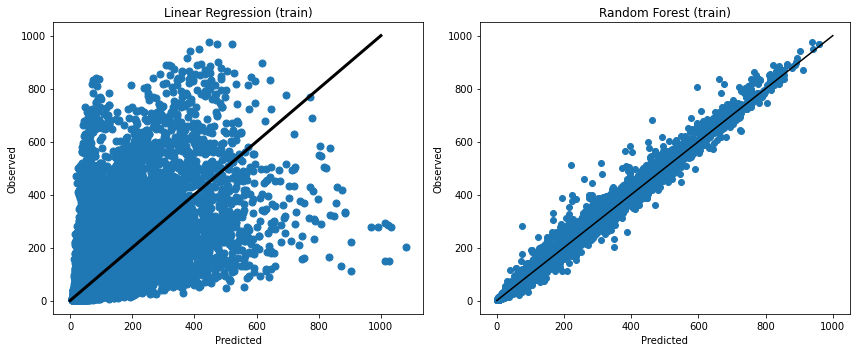

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
x=np.linspace(0,1000)
y=x
lines=plt.plot(np.exp(Lin_model.predict(X_train)),y_train,'o',x,y,'k')
plt.setp(lines[0], markersize=7)
plt.setp(lines[1], linewidth=3)
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Linear Regression (train)')
plt.tight_layout()

plt.subplot(1,2,2)
lines2=plt.plot(np.exp(RF_model.predict(X_train)),y_train,'o',x,y,'k')
plt.setp(lines[0], markersize=7)
plt.setp(lines[1], linewidth=3)
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Random Forest (train)')
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

RF_model = RandomForestRegressor()
RMSLE_scorer = metrics.make_scorer(RMSLE, greater_is_better=False)
RF_params = {'n_estimators' : [100, 150, 200]}

GS_RF_model=GridSearchCV(estimator=RF_model,
                         param_grid=RF_params,
                         scoring=RMSLE_scorer,
                         cv=5)

GS_RF_model.fit(X_train, log_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 150, 200]},
             scoring=make_scorer(RMSLE, greater_is_better=False))

In [ ]:
GS_RF_model.best_params_

{'n_estimators': 200}

In [ ]:
GS_RF_model.best_estimator_.predict(X_train)

array([6.03199912, 6.00859642, 3.13943121, ..., 5.69622534, 6.50025512,
       4.32971938])

In [ ]:
RMSLE(log_y_train, GS_RF_model.best_estimator_.predict(X_train))

count    0.115428
dtype: float64

In [ ]:
RMSLE(log_y_test, GS_RF_model.best_estimator_.predict(X_test))

count    0.306577
dtype: float64